<a href="https://colab.research.google.com/github/harishkodidela/Data-Science-Project/blob/main/rain_pdf_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
data = pd.read_csv("https://raw.githubusercontent.com/harishkodidela/Data-Science-Project/main/bengaluru1972_2022.csv")
data

data.head()

,datetime,rain,temp_min,temp_max
0,1972-01-01,0.0,16.16,27.92
1,1972-01-02,0.0,15.08,27.79
2,1972-01-03,0.0,13.68,28.73
3,1972-01-04,0.0,14.15,28.92
4,1972-01-05,0.0,13.68,28.44


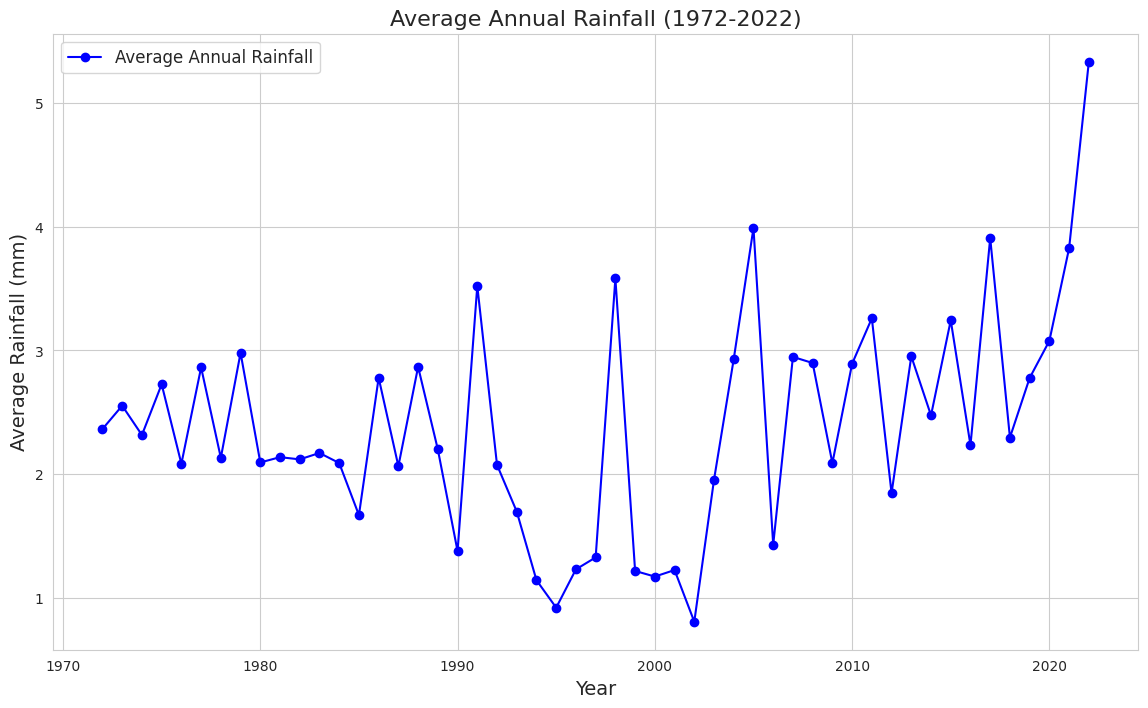

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['year'] = data['datetime'].dt.year
annual_rainfall = data.groupby('year')['rain'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
plt.plot(annual_rainfall['year'], annual_rainfall['rain'], marker='o', linestyle='-', color='blue', label='Average Annual Rainfall')

plt.title('Average Annual Rainfall (1972-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

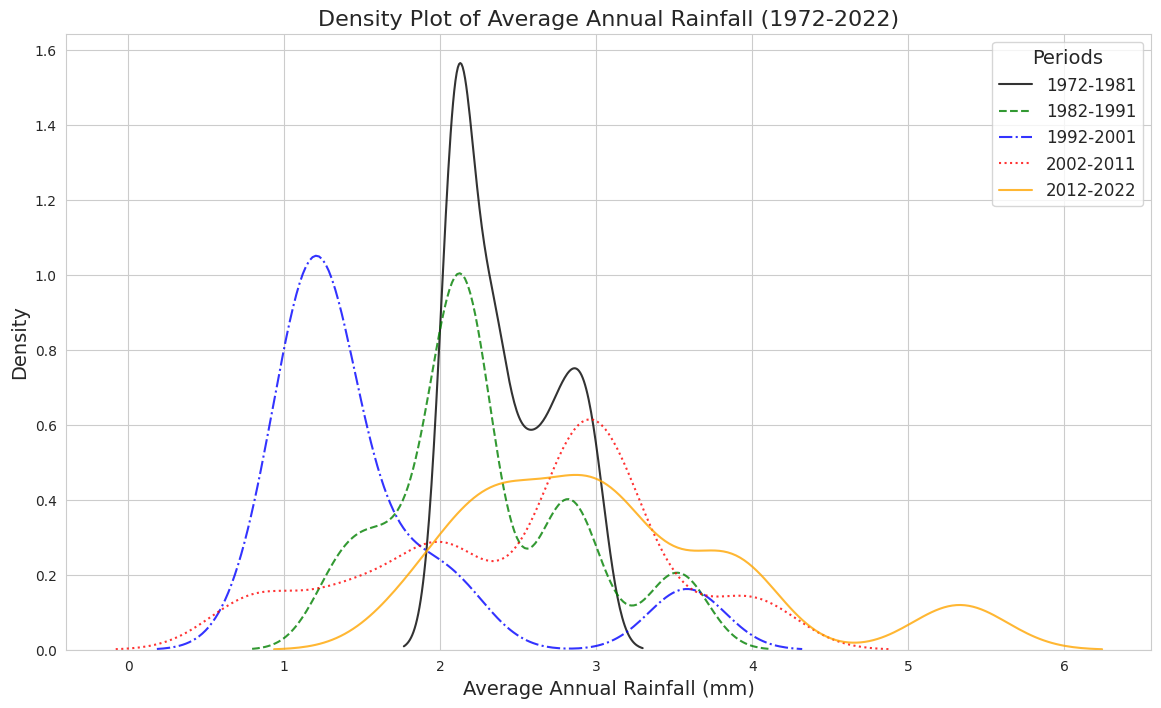

In [ ]:
periods = [(1972, 1981), (1982, 1991), (1992, 2001), (2002, 2011), (2012, 2022)]
colors = ['black', 'green', 'blue', 'red', 'orange']
linestyles = ['-', '--', '-.', ':', '-']  # Solid and dashed line styles
labels = [f'{start}-{end}' for start, end in periods]
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

for (start, end), color, linestyle, label in zip(periods, colors, linestyles, labels):
    subset = annual_rainfall[(annual_rainfall['year'] >= start) & (annual_rainfall['year'] <= end)]
    sns.kdeplot(subset['rain'], bw_adjust=0.5, fill=False, color=color, linestyle=linestyle, label=label, alpha=0.8)

plt.title('Density Plot of Average Annual Rainfall (1972-2022)', fontsize=16)
plt.xlabel('Average Annual Rainfall (mm)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Periods', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()


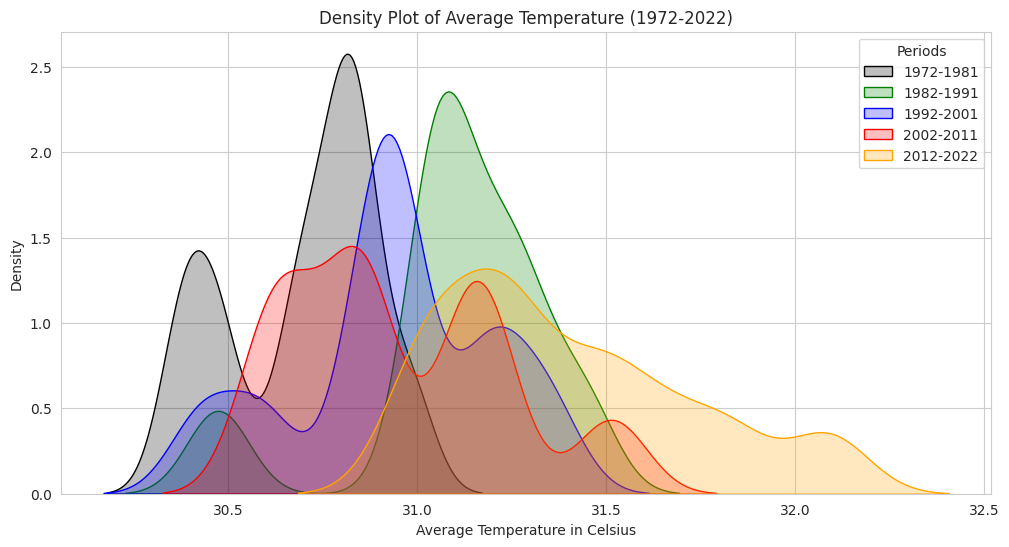

In [ ]:
annual_rainfall = data.groupby('year')['temp_max'].mean().reset_index()

plt.figure(figsize=(12, 6))
for (start, end), color, label in zip(periods, colors, labels):
    subset = annual_rainfall[(annual_rainfall['year'] >= start) & (annual_rainfall['year'] <= end)]
    sns.kdeplot(subset['temp_max'], bw_adjust=0.5, fill=True, color=color, label=label)

plt.title('Density Plot of Average Temperature (1972-2022)')
plt.xlabel('Average Temperature in Celsius')
plt.ylabel('Density')
plt.legend(title='Periods')
plt.grid(True)
plt.show()